In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import scipy.io as sio
from pandas import Series


---
# VIDEO: Total and windowed variance and RMS
---


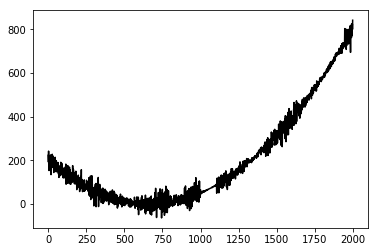

In [6]:
# generate signal with varying variability
n = 2000
p = 20 # poles for random interpolation

# amplitude modulator
ampmod = griddata(np.arange(0,p), np.random.rand(p)*30, np.linspace(0,p-1,n), method='nearest')
ampmod = ampmod + np.mean(ampmod)/3*np.sin(np.linspace(0,6*np.pi,n))

# signal and modulated noise plus quadratic
signal1 = ampmod * np.random.randn(n)
signal1 = signal + np.linspace(-10,20,n)**2


# plot the signal
plt.plot(signal1,'k')
plt.show()

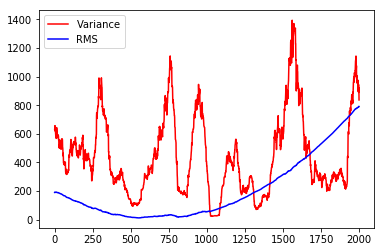

In [9]:
## compute windowed variance and RMS

# window size (NOTE: actual window is halfwin*2+1)
halfwin = 25 # in points

var_ts = np.zeros(n)
rms_ts = np.zeros(n)

for ti in range(0,n):
    
    # boundary points
    low_bnd = np.max((0,ti-halfwin))
    upp_bnd = np.min((n,ti+halfwin))
    
    # signal segment
    tmpsig = signal1[range(low_bnd,upp_bnd)]
    
    # compute variance and RMS in this window
    var_ts[ti] = np.var(tmpsig)
    rms_ts[ti] = np.sqrt(np.mean( tmpsig**2 ))


# and plot
plt.plot(var_ts,'r',label='Variance')
plt.plot(rms_ts,'b',label='RMS')
plt.legend()
plt.show()


---
# VIDEO: Signal-to-noise ratio (SNR)
---


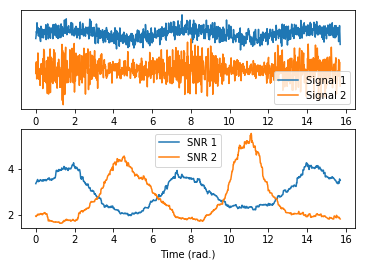

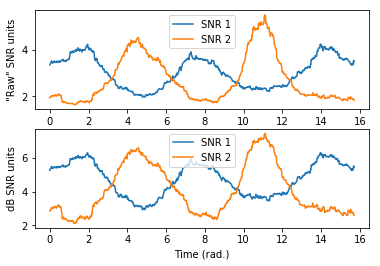

In [14]:

# simulation params
pnts = 1000
time = np.linspace(0,5*np.pi,pnts)

# one signal
signal1 = 3+np.sin(time)
signal1 = signal1 + np.random.randn(pnts)

# another signal
signal2 = 5 + np.random.randn(pnts) * (2+np.sin(time))



# compute SNR in sliding windows
k = int(pnts*.05)  # one-sided window is 5% of signal length

# initialize
snr_ts1 = np.zeros(pnts)
snr_ts2 = np.zeros(pnts)


# loop over time points
for i in range(0,pnts):
    
    # time boundaries
    bndL = max((0,i-k))
    bndU = min((pnts,i+k))
    
    # extract parts of signals
    sigpart1 = signal1[range(bndL,bndU)]
    sigpart2 = signal2[range(bndL,bndU)]
    
    # compute windowed SNR
    snr_ts1[i] = np.mean(sigpart1) / np.std(sigpart1)
    snr_ts2[i] = np.mean(sigpart2) / np.std(sigpart2)
    


# plot the signals
plt.subplot(211)
plt.plot(time,signal1+10,label='Signal 1')
plt.plot(time,signal2,label='Signal 2')
plt.yticks([],[])
plt.xlabel('Time (rad.)')
plt.legend()

# plot SNRs
plt.subplot(212)
plt.plot(time,snr_ts1,label='SNR 1')
plt.plot(time,snr_ts2,label='SNR 2')
plt.legend()
plt.xlabel('Time (rad.)')
plt.show()


# plot SNRs
plt.subplot(211)
plt.plot(time,snr_ts1,label='SNR 1')
plt.plot(time,snr_ts2,label='SNR 2')
plt.legend()
plt.ylabel('"Raw" SNR units')
plt.xlabel('Time (rad.)')


plt.subplot(212)
plt.plot(time,10*np.log10(snr_ts1),label='SNR 1')
plt.plot(time,10*np.log10(snr_ts2),label='SNR 2')
plt.legend()
plt.ylabel('dB SNR units')
plt.xlabel('Time (rad.)')
plt.show()

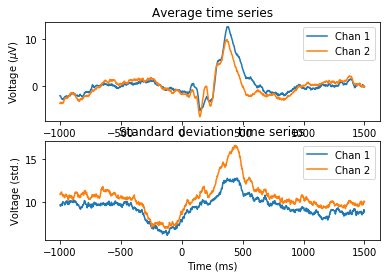

/home/mxc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in log10


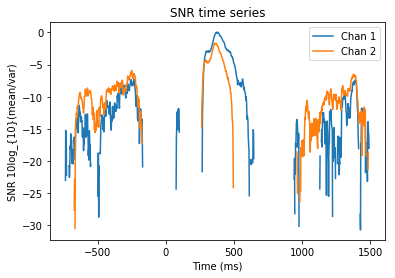

In [93]:
##  try in a voltage time series

# import data
matdat = sio.loadmat('SNRdata.mat')
timevec = np.squeeze( matdat['timevec'] )
eegdata = matdat['eegdata']


# plot mean and std data time series
plt.subplot(211)
plt.plot(timevec,np.mean(eegdata,2).T)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage ($\mu$V)')
plt.legend(['Chan 1','Chan 2'])
plt.title('Average time series')


plt.subplot(212)
plt.plot(timevec,np.std(eegdata,2).T)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (std.)')
plt.legend(['Chan 1','Chan 2'])
plt.title('Standard deviation time series')

plt.show()




## compute SNR
snr = np.mean(eegdata,2) / np.std(eegdata,2)

# plot
plt.plot(timevec,10*np.log10(snr).T)
plt.xlabel('Time (ms)')
plt.ylabel('SNR 10log_{10}(mean/var)')
plt.legend(['Chan 1','Chan 2'])
plt.title('SNR time series')
plt.show()

In [48]:
## alternative: SNR at a point

# pick time point
timepoint = 375
basetime  = [-500, 0]

# convert baseline time window to indices


# average over repetitions
erp = np.mean(eegdata,2)
bidx1 = np.argmin((timevec-basetime[0])**2)
bidx2 = np.argmin((timevec-basetime[1])**2)


# SNR components
snr_num = erp[:,np.argmin((timevec-timepoint)**2)]
snr_den = np.std( erp[:,range(bidx1,bidx2)] ,1)



# display SNR in the command window
print('SNR at %d ms in channel 1 = %g' %(timepoint,snr_num[0]/snr_den[0]) )
print('SNR at %d ms in channel 2 = %g' %(timepoint,snr_num[1]/snr_den[1]) )


SNR at 375 ms in channel 1 = 17.9399
SNR at 375 ms in channel 2 = 9.25177



---
# VIDEO: Coefficient of variation
---


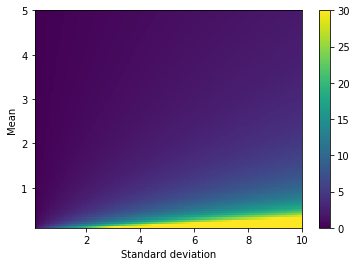

In [51]:
# number of data points
nmeans = 100
nstds  = 110

# ranges of means (den.) and standard deviations (num.)
means = np.linspace(.1,5,nmeans)
stds  = np.linspace(.1,10,nstds)


# initialize matrix
cv = np.zeros((nmeans,nstds))

# loop over all values and populate matrix
for mi in range(0,nmeans):
    for si in range(0,nstds):
        
        # coefficient of variation
        cv[mi,si] = stds[si] / means[mi]
        


# show in an image
plt.pcolormesh(stds,means,cv,vmin=0,vmax=30)
plt.ylabel('Mean')
plt.xlabel('Standard deviation')
plt.colorbar()
plt.show()


---
# VIDEO: Entropy
---


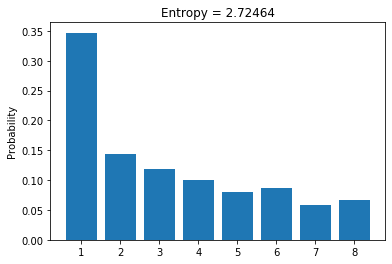

In [2]:
## "discrete" entropy

# generate data
N = 1000
numbers = np.ceil( 8*np.random.rand(N)**2 )


# get counts and probabilities
u = np.unique(numbers)
probs = np.zeros(len(u))

for ui in range(0,len(u)):
    probs[ui] = np.sum(numbers==u[ui]) / N


# compute entropy
entropee = -np.sum( probs*np.log2(probs+np.finfo(float).eps) )


# plot
plt.bar(u,probs)
plt.title('Entropy = %g' %entropee)
plt.ylabel('Probability')
plt.show()

(0.484, 0.516)


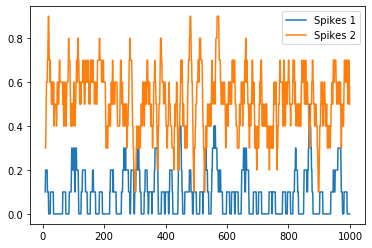

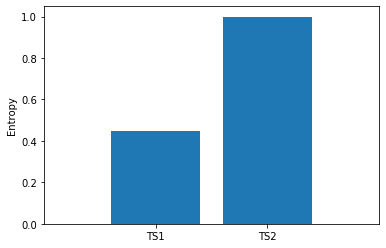

In [8]:
## same procedure for spike times

# generate spike times series
spikets1 = np.zeros(N)
spikets2 = np.zeros(N)

# nonrandom
spikets1[ np.random.rand(N)>.9 ] = 1

# equal probability
spikets2[ np.random.rand(N)>.5 ] = 1

# probabilities
# (note: this was incorrect in the video; the entropy of the entire time
# series requires the probability of each event type. And the theoretical
# entropy of a random binary sequence is 1.)
probs1 = ( np.sum(spikets1==0)/N, np.sum(spikets1==1)/N )
probs2 = ( np.sum(spikets2==0)/N, np.sum(spikets2==1)/N )

# compute entropy
entropee1 = -np.sum( probs1*np.log2(probs1+np.finfo(float).eps) )
entropee2 = -np.sum( probs2*np.log2(probs2+np.finfo(float).eps) )



# convert data to pandas for smoothing
spikets1 = Series(spikets1).rolling(window=10)
spikets2 = Series(spikets2).rolling(window=10)


plt.plot(np.arange(0,N),spikets1.mean(),label='Spikes 1')
plt.plot(np.arange(0,N),spikets2.mean(),label='Spikes 2')
plt.legend()
plt.show()


plt.bar([1,2],[ entropee1, entropee2 ])
plt.xlim([0, 3])
plt.xticks([1,2],('TS1','TS2'))
plt.ylabel('Entropy')
plt.show()


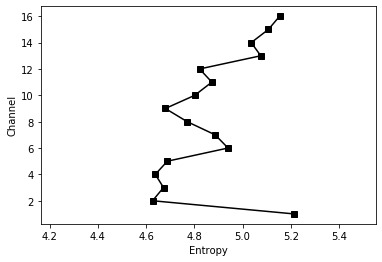

In [3]:
## extra step for analog time series

# load data time series
matdat = sio.loadmat('v1_laminar.mat')
csd = matdat['csd']

# sizes of the dimensions (chan X time X repetitions)
csdsize = np.shape(csd)

# compute event-related potential (averaging)
erp = np.mean(csd,2)


# crucial parameter -- number of bins!
nbins = 50


# initialize entropy matrix
entro = np.zeros(csdsize[0])

# compute entropy for each channel
for chani in range(0,csdsize[0]):
    
    # find boundaries
    edges = np.linspace(np.min(erp[chani,:]),np.max(erp[chani,:]),nbins)
    
    # bin the data
    nPerBin,bins = np.histogram(erp[chani,:],edges)
    
    # convert to probability
    probs = nPerBin / np.sum(nPerBin)
    
    # compute entropy
    entro[chani] = -np.sum( probs*np.log2(probs+np.finfo(float).eps) )
    

# plot
plt.plot(entro,np.arange(1,17),'ks-')
plt.xlim([np.min(entro)*.9, np.min(entro)*1.2])
plt.xlabel('Entropy')
plt.ylabel('Channel')
plt.show()

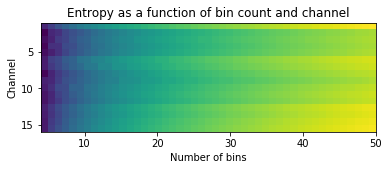

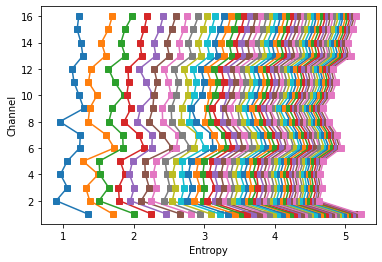

In [22]:
## loop over bin count

# variable number of bins!
nbins = np.arange(4,51)

# initialize
entro = np.zeros((np.shape(erp)[0],len(nbins)))

for bini in range(len(nbins)):
    
    # compute entropy as above
    for chani in range(np.shape(erp)[0]):
        edges = np.linspace(np.min(erp[chani,:]),np.max(erp[chani,:]),nbins[bini])
        nPerBin,bins = np.histogram(erp[chani,:],edges)
        probs = nPerBin / np.sum(nPerBin)
        entro[chani,bini] = -np.sum( probs*np.log2(probs+np.finfo(float).eps) )

        
plt.imshow(entro, extent=[4,50,16,1])
plt.xlabel('Number of bins')
plt.ylabel('Channel')
plt.title('Entropy as a function of bin count and channel')
plt.show()


plt.plot(entro,np.arange(1,17),'s-')
plt.xlabel('Entropy')
plt.ylabel('Channel')
plt.show()